Exercise 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Path to your file in Drive
file_path = '/content/LogP_LogS.csv'

data = pd.read_csv(file_path)
data.head()

,Compound ID,InChIKey,SMILES,logS,logP,MW
0,C1711,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-18.217693,17.8539,863.344
1,C1712,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-17.468457,14.2326,641.065
2,C1713,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-16.259392,11.8156,566.939
3,C1714,BDIWFCKBPZPBQT-UHFFFAOYSA-N,CCCC[Sn](S[Sn](CCCC)(CCCC)CCCC)(CCCC)CCCC,-15.676287,10.4112,612.153
4,C1715,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-15.205120,12.0826,546.846


In [9]:
# Install RDKit
!pip install rdkit-pypi

# Install additional libraries if necessary
!pip install Pillow  # For im

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  # For displaying molecules in notebooks
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [11]:
# SMILES string for D-Glucose
smiles_glucose = 'C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O'
smiles1 = 'C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O'


# SMILES string for Luseogliflozin
smiles_luseogliflozin = 'CCOC1=CC=C(C=C1)CC2=CC(=C(C=C2C)OC)[C@H]3[C@@H]([C@H]([C@@H]([C@H](S3)CO)O)O)O'
smiles2 = 'CCOC1=CC=C(C=C1)CC2=CC(=C(C=C2C)OC)[C@H]3[C@@H]([C@H]([C@@H]([C@H](S3)CO)O)O)O'


In [12]:
# Create molecule object for D-Glucose
mol_glucose = Chem.MolFromSmiles(smiles_glucose)

# Create molecule object for Luseogliflozin
mol_luseogliflozin = Chem.MolFromSmiles(smiles_luseogliflozin)


In [13]:
# Generate 2D coordinates
Chem.rdDepictor.Compute2DCoords(mol_glucose)
Chem.rdDepictor.Compute2DCoords(mol_luseogliflozin)

# Save images to files
img_glucose = Draw.MolToFile(mol_glucose, 'D_Glucose.png')
img_luseogliflozin = Draw.MolToFile(mol_luseogliflozin, 'Luseogliflozin.png')


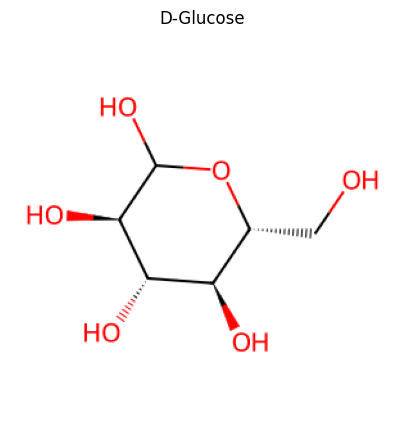

In [14]:
# Display D-Glucose
plt.figure(figsize=(5, 5))
img = mpimg.imread('D_Glucose.png')
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title('D-Glucose')
plt.show()




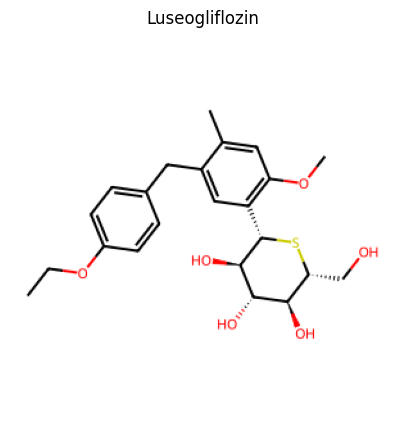

In [15]:
# Display Luseogliflozin
plt.figure(figsize=(5, 5))
img = mpimg.imread('Luseogliflozin.png')
plt.imshow(img)
plt.axis('off')
plt.title('Luseogliflozin')
plt.show()

Exercise 2

In [16]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display


In [17]:
num_rows = len(data)
print(f'This data file has {num_rows} molecules.')


This data file has 9943 molecules.


In [18]:
smiles_list = data['SMILES']
LogS = data['logS']
LogP = data['logP']
MW = data['MW']


In [19]:
N_Row = 320  # Adjust as needed


In [20]:
if N_Row < 1 or N_Row > num_rows:
    raise ValueError(f'Invalid row number. Please enter a number between 1 and {num_rows}.')


In [21]:
N_Row_adj = N_Row - 1  # Adjust for zero-based indexing


In [22]:
sample_SMILES = smiles_list.iloc[N_Row_adj]
LogS_data = LogS.iloc[N_Row_adj]
LogP_data = LogP.iloc[N_Row_adj]

print(f'SMILES for molecule at row {N_Row}: {sample_SMILES}')
print(f'LogS: {LogS_data}')
print(f'LogP: {LogP_data}')


SMILES for molecule at row 320: CN(CCCN1c2ccccc2Sc2c1cc(cc2)C(C)(C)C)C.Cl
LogS: -7.353609903
LogP: 6.4055


In [23]:
mol = Chem.MolFromSmiles(sample_SMILES)


In [24]:
if mol is None:
    raise ValueError(f"Invalid SMILES string at row {N_Row}.")


In [25]:
Chem.rdDepictor.Compute2DCoords(mol)


0

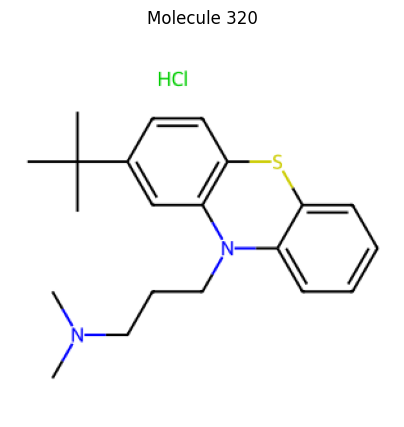

In [26]:
# Save the image to a file
image_filename = f'molecule_{N_Row}.png'
Draw.MolToFile(mol, image_filename)

# Display the image using matplotlib
img = mpimg.imread(image_filename)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title(f'Molecule {N_Row}')
plt.show()


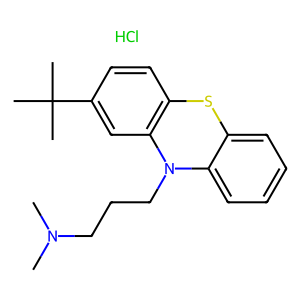

In [27]:
# Draw and display the molecule directly
img = Draw.MolToImage(mol, size=(300, 300))
display(img)


Exercise 3

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['LogP_normalized', 'LogS_normalized']] = scaler.fit_transform(data[['logP', 'logS']])

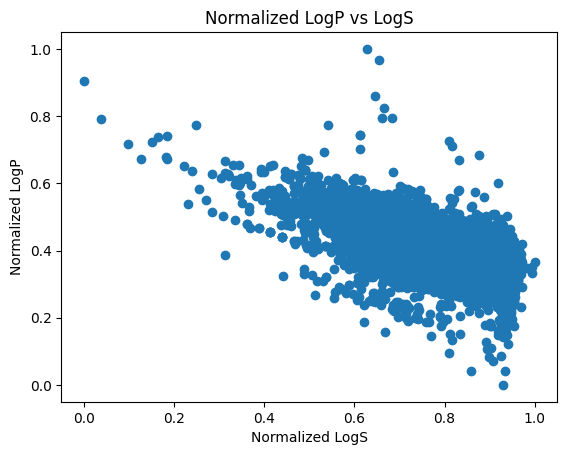

In [29]:
import matplotlib.pyplot as plt

plt.scatter(data['LogS_normalized'], data['LogP_normalized'])
plt.xlabel('Normalized LogS')
plt.ylabel('Normalized LogP')
plt.title('Normalized LogP vs LogS')
plt.show()

In [30]:
# Define conditions for partitioning
conditions = [
    (data['LogP_normalized'] >= 0.5) & (data['LogS_normalized'] >= 0.5),
    (data['LogP_normalized'] >= 0.5) & (data['LogS_normalized'] < 0.5),
    (data['LogP_normalized'] < 0.5) & (data['LogS_normalized'] >= 0.5),
    (data['LogP_normalized'] < 0.5) & (data['LogS_normalized'] < 0.5),
]



# Assign group labels
choices = ['Group1', 'Group2', 'Group3', 'Group4']
data['Group'] = np.select(conditions, choices)

In [31]:
for group in data['Group'].unique():
    group_data = data[data['Group'] == group]
    filename = f'{group}.csv'
    group_data.to_csv(filename, index=False)


In [32]:
group_counts = data['Group'].value_counts()
print(group_counts)

Group
Group3    8856
Group1     908
Group2     141
Group4      38
Name: count, dtype: int64


In [33]:
largest_group = group_counts.idxmax()
print(f"The largest group is {largest_group}")

The largest group is Group3


In [36]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the folder path and file name
folder_path = '/content/'  # Adjust as needed
file_name = 'LogP_LogS.csv'

# Load the data
data = pd.read_csv(os.path.join(folder_path, file_name))

# Normalize LogP and LogS
scaler = MinMaxScaler()
data[['LogP_normalized', 'LogS_normalized']] = scaler.fit_transform(data[['logP', 'logS']])

# Partition the data and create labels
conditions = [
    (data['LogP_normalized'] >= 0.5) & (data['LogS_normalized'] >= 0.5),
    (data['LogP_normalized'] < 0.5) & (data['LogS_normalized'] >= 0.5),
    (data['LogP_normalized'] >= 0.5) & (data['LogS_normalized'] < 0.5),
    (data['LogP_normalized'] < 0.5) & (data['LogS_normalized'] < 0.5),
]
choices = ['HighLogP_HighLogS', 'LowLogP_HighLogS', 'HighLogP_LowLogS', 'LowLogP_LowLogS']
data['labels'] = np.select(conditions, choices)

# Calculate and print the number of molecules in each group
num_highlogp_highlogs = sum(data['labels'] == 'HighLogP_HighLogS')
num_lowlogp_highlogs = sum(data['labels'] == 'LowLogP_HighLogS')
num_highlogp_lowlogs = sum(data['labels'] == 'HighLogP_LowLogS')
num_lowlogp_lowlogs = sum(data['labels'] == 'LowLogP_LowLogS')

print('Number of molecules in each group:')
print(f'HighLogP_HighLogS: {num_highlogp_highlogs}')
print(f'LowLogP_HighLogS: {num_lowlogp_highlogs}')
print(f'HighLogP_LowLogS: {num_highlogp_lowlogs}')
print(f'LowLogP_LowLogS: {num_lowlogp_lowlogs}')

# Sum up all the numbers from each group
total_molecules = (num_highlogp_highlogs + num_lowlogp_highlogs +
                   num_highlogp_lowlogs + num_lowlogp_lowlogs)

# Verify the total number of molecules
original_molecule_count = len(data)
if total_molecules == original_molecule_count:
    print(f'The sum of all groups ({total_molecules}) matches the total number of molecules in the original file ({original_molecule_count}).')
else:
    print(f'Mismatch in total molecule count! Sum of groups: {total_molecules}, Original count: {original_molecule_count}')

# Generate CSV files for each partition
output_folder = folder_path  # Adjust if you want to save to a different folder

data[data['labels'] == 'HighLogP_HighLogS'].to_csv(os.path.join(output_folder, 'HighLogP_HighLogS.csv'), index=False)
data[data['labels'] == 'LowLogP_HighLogS'].to_csv(os.path.join(output_folder, 'LowLogP_HighLogS.csv'), index=False)
data[data['labels'] == 'HighLogP_LowLogS'].to_csv(os.path.join(output_folder, 'HighLogP_LowLogS.csv'), index=False)
data[data['labels'] == 'LowLogP_LowLogS'].to_csv(os.path.join(output_folder, 'LowLogP_LowLogS.csv'), index=False)


Number of molecules in each group:
HighLogP_HighLogS: 908
LowLogP_HighLogS: 8856
HighLogP_LowLogS: 141
LowLogP_LowLogS: 38
The sum of all groups (9943) matches the total number of molecules in the original file (9943).


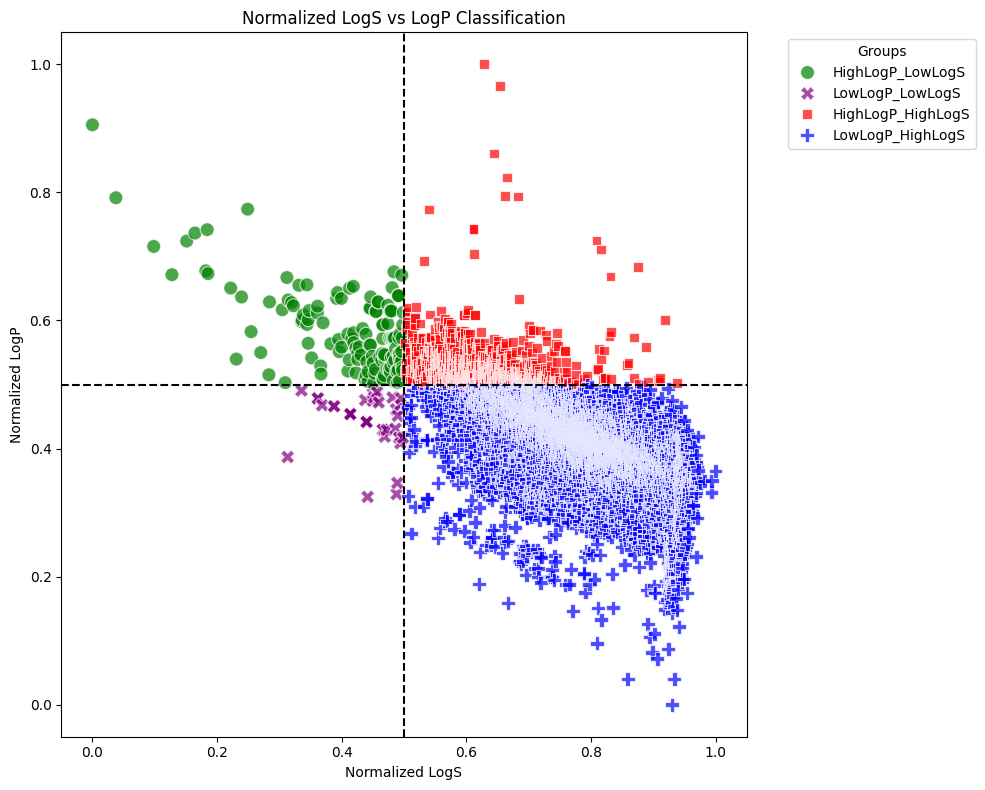

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the columns:
# 'LogP_normalized', 'LogS_normalized', and 'labels'

# Define a color palette for the groups
palette = {
    'HighLogP_HighLogS': 'red',
    'LowLogP_HighLogS': 'blue',
    'HighLogP_LowLogS': 'green',
    'LowLogP_LowLogS': 'purple'
}

# Create a scatter plot
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=data,
    x='LogS_normalized',
    y='LogP_normalized',
    hue='labels',
    palette=palette,
    style='labels',
    s=100,        # Size of the markers
    alpha=0.7     # Transparency of the markers
)

# Add vertical and horizontal lines at 0.5 to indicate the partitioning thresholds
plt.axvline(x=0.5, color='black', linestyle='--')
plt.axhline(y=0.5, color='black', linestyle='--')

plt.title('Normalized LogS vs LogP Classification')
plt.xlabel('Normalized LogS')
plt.ylabel('Normalized LogP')

# Adjust the legend
plt.legend(title='Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Exercise 4

In [38]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, DataStructs
from rdkit.Chem import rdFingerprintGenerator  # Import the fingerprint generator module

# Function to compute similarity matrix
def compute_similarity(group_data):
    mols = [Chem.MolFromSmiles(smi) for smi in group_data['SMILES']]

    # Create a Morgan fingerprint generator
    morgan_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

    # Generate fingerprints using the generator
    fps = [morgan_generator.GetFingerprint(mol) for mol in mols]

    sim_matrix = []

    for i in range(len(fps)):
        similarities = []
        for j in range(len(fps)):
            sim = DataStructs.TanimotoSimilarity(fps[i], fps[j])
            similarities.append(sim)
        sim_matrix.append(similarities)
    return sim_matrix

# Example for Group1
group1_data = pd.read_csv('Group1.csv')
sim_matrix_group1 = compute_similarity(group1_data)


In [39]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# Convert similarity matrix to distance matrix
distance_matrix = 1 - np.array(sim_matrix_group1)

# Perform hierarchical clustering
Z = linkage(squareform(distance_matrix), 'average')
clusters = fcluster(Z, t=0.7, criterion='distance')

# Add cluster labels to data
group1_data['Cluster'] = clusters


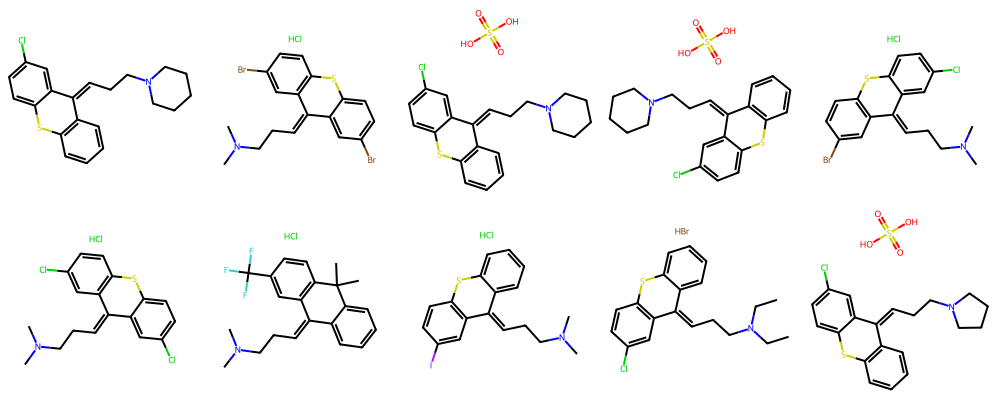

In [40]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Select the largest cluster
largest_cluster = group1_data['Cluster'].value_counts().idxmax()
cluster_data = group1_data[group1_data['Cluster'] == largest_cluster].head(10)

# Convert SMILES to molecule objects
mols = []
for smi in cluster_data['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        mols.append(mol)
    else:
        print(f"Invalid SMILES: {smi}")

# Draw molecules in a grid
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))

# Display the image
display(img)

# Optionally save the image
# img.save('molecules_grid.png')


In [46]:
# Install necessary libraries
#!pip install --upgrade transformers huggingface_hub

# Authenticate with Hugging Face (if necessary)
from huggingface_hub import notebook_login
notebook_login()

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# Use the correct model identifier
model_name = 'DeepChem/ChemBERTa-77M-MLM'

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=1,
    problem_type='regression',
    use_auth_token=True
)


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:809: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MLM and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Prepare dataset
# Assume you have a DataFrame 'data' with 'SMILES' and 'labels'
texts = list(data['SMILES'])
labels = data[['logP', 'logS']].values  # You might need to define how to use both LogP and LogS

# Tokenize
encodings = tokenizer(texts, truncation=True, padding=True)

# Create a Dataset object
import torch

class ChemDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

dataset = ChemDataset(encodings, labels)

# Fine-tune the model
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
)

trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 58


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 37


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 37


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 37


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [ ]:
# Install DeepChem
!pip install --quiet deepchem

# Install RDKit
!pip install --quiet rdkit-pypi

# Install Transformers
!pip install --quiet transformers

In [ ]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import SimilarityMaps
import matplotlib.pyplot as plt
import numpy as np
from transformers import BertTokenizer, BertForMaskedLM
import torch


In [ ]:
# Define the SMILES string and the mask
SMILES = "CCN(CC)C(=O)c1cccnc1"
Mask = "CCN"
Masked_SMILES = "<mask>(CC)C(=O)c1cccnc1"


In [ ]:
# Convert SMILES to RDKit molecule
mol = Chem.MolFromSmiles(SMILES)


In [ ]:
# Convert SMILES to RDKit molecule
mol = Chem.MolFromSmiles(SMILES)


In [ ]:
# Generate 2D coordinates
Chem.rdDepictor.Compute2DCoords(mol)

# Draw the molecule
img = Draw.MolToImage(mol, size=(300, 300))
display(img)


In [ ]:
# Convert the mask to a molecule
submol = Chem.MolFromSmiles(Mask)

# Find the substructure match
match = mol.GetSubstructMatch(submol)

# Prepare the drawing options
d = rdMolDraw2D.MolDraw2DCairo(300, 300)
opts = d.drawOptions()
opts.highlightColor = (0.8, 0.8, 0.0)  # Highlight color (yellow)

# Highlight the matching atoms
highlight_atoms = list(match)

# Draw the molecule with highlighted substructure
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=highlight_atoms)
d.FinishDrawing()

# Display the image
img_data = d.GetDrawingText()
from IPython.display import Image
display(Image(img_data))


In [ ]:
# Install additional transformers models (if necessary)
!pip install --quiet huggingface_hub

from transformers import AutoTokenizer, AutoModelForMaskedLM


In [ ]:
# Define the model name
model_name = "seyonec/ChemBERTa-zinc-base-v1"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)


In [ ]:
# Tokenize the masked SMILES string
inputs = tokenizer(Masked_SMILES, return_tensors='pt')


In [ ]:
# Get the index of the masked token
mask_token_index = torch.where(inputs['input_ids'][0] == tokenizer.mask_token_id)[0]


In [ ]:
# Get the model's predictions
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits


In [ ]:
# Get the predicted token IDs at the masked position
predicted_token_ids = logits[0, mask_token_index].topk(5).indices[0].tolist()


In [ ]:
# Convert the token IDs to tokens (subwords)
predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_token_ids)


In [ ]:
print(f"Masked SMILES: {Masked_SMILES}")
print("Top 5 predictions for the masked token:")
for i, token in enumerate(predicted_tokens):
    # Replace the mask token with the predicted token
    predicted_smiles = Masked_SMILES.replace(tokenizer.mask_token, token)
    print(f"{i+1}: {predicted_smiles}")


In [ ]:
# Install necessary libraries
!pip install --quiet deepchem rdkit-pypi transformers huggingface_hub

# Import libraries
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch

# Define the SMILES string and the mask
SMILES = "CCN(CC)C(=O)c1cccnc1"
Mask = "CCN"
Masked_SMILES = "<mask>(CC)C(=O)c1cccnc1"

# Convert SMILES to RDKit molecule
mol = Chem.MolFromSmiles(SMILES)

# Generate 2D coordinates
Chem.rdDepictor.Compute2DCoords(mol)

# Draw the molecule
img = Draw.MolToImage(mol, size=(300, 300))
display(img)

# Convert the mask to a molecule
submol = Chem.MolFromSmiles(Mask)

# Find the substructure match
match = mol.GetSubstructMatch(submol)

# Prepare the drawing options
d = rdMolDraw2D.MolDraw2DCairo(300, 300)
opts = d.drawOptions()
opts.highlightColor = (0.8, 0.8, 0.0)  # Highlight color (yellow)

# Highlight the matching atoms
highlight_atoms = list(match)

# Draw the molecule with highlighted substructure
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=highlight_atoms)
d.FinishDrawing()

# Display the image with highlighted substructure
img_data = d.GetDrawingText()
from IPython.display import Image
display(Image(img_data))

# Load the ChemBERTa model and tokenizer
model_name = "seyonec/ChemBERTa-zinc-base-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# Tokenize the masked SMILES string
inputs = tokenizer(Masked_SMILES, return_tensors='pt')

# Get the index of the masked token
mask_token_index = torch.where(inputs['input_ids'][0] == tokenizer.mask_token_id)[0]

# Get the model's predictions
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits

# Get the predicted token IDs at the masked position
predicted_token_ids = logits[0, mask_token_index].topk(5).indices[0].tolist()

# Convert the token IDs to tokens (subwords)
predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_token_ids)

# Display the predictions
print(f"Masked SMILES: {Masked_SMILES}")
print("Top 5 predictions for the masked token:")
for i, token in enumerate(predicted_tokens):
    # Replace the mask token with the predicted token
    predicted_smiles = Masked_SMILES.replace(tokenizer.mask_token, token)
    print(f"{i+1}: {predicted_smiles}")


In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer, pipeline, RobertaModel, RobertaTokenizer


tokenizer = AutoTokenizer.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")


In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer, pipeline, RobertaModel, RobertaTokenizer

model = AutoModelWithLMHead.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")
tokenizer = AutoTokenizer.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")

fill_mask = pipeline('fill-mask', model=model, tokenizer=tokenizer)

masked_smi = fill_mask(smiles_mask)

for smi in masked_smi:
  print(smi)






In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer, pipeline, RobertaModel, RobertaTokenizer


model = AutoModelWithLMHead.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")

















In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

def compute_similarity(smiles1, smiles2):
    # Convert SMILES to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Generate Morgan fingerprints
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2)

    # Compute Tanimoto similarity
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

    return similarity

similarity = compute_similarity(smiles1, smiles2)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw

def compute_similarity_and_draw(smiles1, smiles2, imagePath1, imagePath2):
    # Convert SMILES to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Generate Morgan fingerprints
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2)

    # Compute Tanimoto similarity
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

    # Draw molecules and save as images
    Draw.MolToFile(mol1, imagePath1)
    Draw.MolToFile(mol2, imagePath2)

    return similarity

# Define imagePath1 and imagePath2 BEFORE calling the function
imagePath1 = '/content/drive/My Drive/Colab Notebooks/1.png'
imagePath2 = '/content/drive/My Drive/Colab Notebooks/2.png'

similarity = compute_similarity_and_draw(smiles1, smiles2, imagePath1, imagePath2)

Exercise 6

In [ ]:
# Install necessary libraries
!pip install torch transformers pandas numpy rdkit-pypi


In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
import numpy as np
from rdkit import Chem
import random


In [ ]:
# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('seyonec/ChemBERTa-zinc-base-v1')

# Load the pre-trained model for regression
model = RobertaForSequenceClassification.from_pretrained(
    'seyonec/ChemBERTa-zinc-base-v1',
    num_labels=1,           # Single output for regression
    problem_type="regression"
)

# Set the model to evaluation mode
model.eval()


In [ ]:
# Load data
file_path = '/content/drive/My Drive/Colab Notebooks/LogP_LogS.csv'

data = pd.read_csv(file_path)




# Assuming SMILES is in column index 2 and LogP in index 4 (0-based indexing)
SMILES_COL_NO = 2  # Column number 3 in MATLAB (SMILES)
LOGP_COL_NO = 4    # Column number 5 in MATLAB (LogP)

# Extract the SMILES and LogP columns
data = data.iloc[:, [SMILES_COL_NO, LOGP_COL_NO]]
data.columns = ['SMILES', 'LogP']


In [ ]:
numSamples = len(data)
randIdx = random.randint(0, numSamples - 1)
selectedSMILES = data.iloc[randIdx]['SMILES']
trueLogP = data.iloc[randIdx]['LogP']

print(f"Selected SMILES: {selectedSMILES}")
print(f"True LogP: {trueLogP}")


In [ ]:
# Set maximum sequence length
maxSequenceLength = 512  # Adjust if necessary

# Tokenize the SMILES string with padding and truncation
inputs = tokenizer(
    selectedSMILES,
    return_tensors='pt',
    padding='max_length',
    truncation=True,
    max_length=maxSequenceLength
)


In [ ]:
with torch.no_grad():
    outputs = model(**inputs)
    predictedLogP = outputs.logits.item()


In [ ]:
error = abs(predictedLogP - trueLogP)



In [ ]:
# Create and display the results table
results = pd.DataFrame({
    'SMILES': [selectedSMILES],
    'True_LogP': [trueLogP],
    'Predicted_LogP': [predictedLogP],
    'Absolute_Error': [error]
})

print(results)


EX7